<a href="https://colab.research.google.com/github/songmyounggi2/Mobile-Programming/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8A%A4%ED%84%B0%EB%94%941%EC%9D%BC%EC%B0%A8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

변화율 가중치로 업데이트 하기

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(diabetes.data.shape, diabetes.target.shape)

diabetes.data[0:3]

(442, 10) (442,)


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [9]:
diabetes.target[:3]

array([151.,  75., 141.])

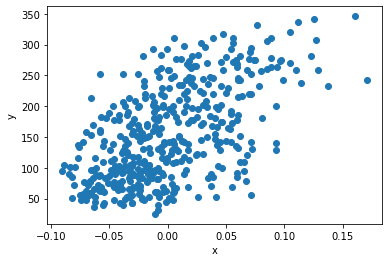

In [11]:
x = diabetes.data[:, 2]
y = diabetes.target
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
w = 1.0
b = 1.0
y_hat = x[0] * w + b
print(y_hat)
print(y[0])
print(x[0])

w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

w_new = w + w_rate
print(w_new)

1.0616962065186886
151.0
0.0616962065186885
1.0678658271705574
0.061696206518688734
1.0616962065186888


In [36]:
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)
b_new = b + 1
print(b_new)

1.1616962065186887
1.0
2.0


오차 역전파로 업데이트 하기
(오차의 크기를 반영해 오차가 클수록 많이 변화하도록 한다)

In [37]:
err = y[0] - y_hat
w_new = w + w_rate *err
b_new = b + 1 *err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [39]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
print(w_new)
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new,b_new)

14.132317616381767
14.122032764040299 75.7274477824319


In [41]:
for x_i,y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
  print(w, b)

588.8107371094616 114.73093154490172
589.2957489603899 105.30847994003898
589.7178847532265 114.80508894461371
588.58119419233 212.837787427697
590.6341073720912 156.41534558802937
592.0738864097578 121.03641049088353
589.9568675556305 165.9238699533457
590.1497601209469 64.11779472247369
590.734159162788 73.58999852262357
599.06747002668 286.9246519118391
610.4417608320141 151.20690020625116
608.8155800008807 58.313660565336534
604.8286050940036 196.5582460073778
604.8483332898257 186.1459722904428
606.1967210628627 133.488092072274
605.321424599346 181.94905664438772
603.5639801464565 140.39757369794734
603.5190161042628 136.6867051110699
603.8696530437444 103.3473316635268
602.5049023975245 178.90702540490494
606.8632739229291 102.26030953457351
607.7511042618513 62.577434102107546
607.7191708185692 70.46159252286012
616.0662902158169 208.16103959164857
614.4097887581847 161.92713539137762
613.8032777546076 209.78630870143007
615.7610871735764 184.47249751775868
607.6555138421613 48

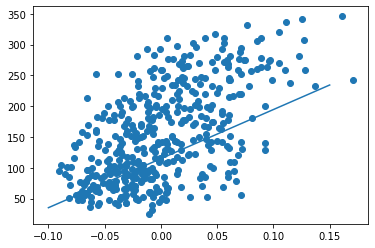

In [43]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w +b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()

에포크 반복하기

In [45]:
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
    print(w, b)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
972.3516632787905 290.6061504834831
977.4260877667265 162.52275307112683
977.647144647274 45.851934916938205
972.797851513079 202.30279096009335
974.8012310718275 158.83138983273224
974.7769513410733 140.6950039761789
968.6094843541053 45.7080807979149
972.4393174286422 141.1200491595769
971.83698983587 166.80462320287634
968.897575775403 111.42100550449894
968.7646113253796 108.10848517999736
968.5932168878365 116.58600927913487
969.8718846357069 206.17577726728467
969.2892362933179 223.19781074548683
968.4770642165099 102.4788248412521
968.8615520475339 186.57196151121704
965.998283082481 92.50818727961706
970.5356460759953 179.7720519459354
970.6806062735866 182.12163234594664
970.1492658842521 255.07021060037613
970.0839999676139 243.5186773343616
964.4495231429828 139.4684749324291
964.4529025145144 139.06432018831185
963.0212130221394 126.56146438095408
955.4294417446717 13.3954649055147
945.6723979649638 188.29892714593834
946.4916852739581 21

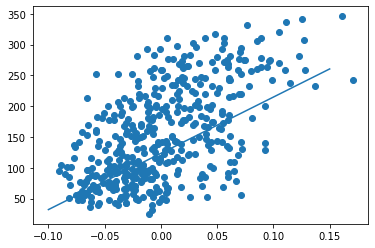

In [47]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]])
plt.show()


287.8416643899983


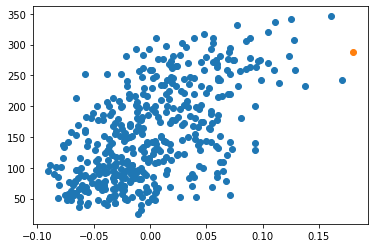

In [49]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.show()
